In [1]:
import pandas as pd
from keras import layers, models, optimizers, losses, metrics 

import pandas as pd
import numpy as np
from keras.utils import np_utils
import keras
from keras.models  import Sequential
from keras import layers
from keras.optimizers import gradient_descent_v2 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow_addons as tfa
import tensorflow as tf

In [2]:
tf.version.VERSION

'2.9.1'

In [17]:
dati = pd.read_csv('datimodelli.csv')
dati = dati[['pm10','pioggia','temperatura','vento','O3','pm2p5']]
pm10_daybefore = [dati['pm10'][0]]
dati['pm10_daybefore'] = pm10_daybefore + list(dati['pm10'][:3873])
dati.head()

,pm10,pioggia,temperatura,vento,O3,pm2p5,pm10_daybefore
0,110.101449,0.402778,0.587884,2.090194,9.823586,96.045455,110.101449
1,76.591549,0.238000,0.373400,3.001944,10.212938,55.760000,110.101449
2,49.943662,0.212500,0.665049,2.112000,32.680785,34.120000,76.591549
3,48.942029,0.216667,0.321896,1.110806,44.895725,30.961538,49.943662
4,63.197183,0.250000,0.232639,0.986722,65.688729,17.173913,48.942029


In [18]:
mean = dati.mean(axis=0)
dati -= mean
std = dati.std(axis=0)
dati /= std

In [19]:
df, cl = (dati[['pioggia','temperatura','vento','O3','pm2p5','pm10_daybefore']], dati['pm10'])
x_train, x_test, y_train, y_test = train_test_split(df, cl, test_size=0.3)

In [20]:
from keras import backend as K
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Modelli

In [128]:
keras.utils.set_random_seed(84)
model = models.Sequential()
model.add(layers.Dense(32, activation ='relu', input_shape = (x_train.shape[1],)))
model.add(layers.Dense(1))

model.compile(optimizer = 'rmsprop', loss='mae', metrics=['mae',r2_keras])

In [129]:
keras.utils.set_random_seed(84)
listaris_supersim=[]
for i in range(0,50,5):
    model.fit(x_train, y_train, epochs = i, batch_size = 1, verbose = 1)
    listaris_supersim.append(model.evaluate(x_test, y_test, verbose = 0))
listaris_supersim

Epoch 1/5
2711/2711 [==============================] - 4s 1ms/step - loss: 0.3533 - mae: 0.3533 - r2_keras: -3700227.5000
Epoch 2/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3097 - mae: 0.3097 - r2_keras: -2646398.7500
Epoch 3/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3016 - mae: 0.3016 - r2_keras: -2289965.0000
Epoch 4/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2951 - mae: 0.2951 - r2_keras: -2206227.5000
Epoch 5/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2907 - mae: 0.2907 - r2_keras: -2123651.2500
Epoch 1/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2855 - mae: 0.2855 - r2_keras: -1992114.7500
Epoch 2/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2816 - mae: 0.2816 - r2_keras: -2046047.7500
Epoch 3/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2763 - mae: 0.2763 - r2_keras: -1958529.8750
Epoch 4/10
2711/2711 

2711/2711 [==============================] - 3s 1ms/step - loss: 0.2368 - mae: 0.2368 - r2_keras: -1471056.2500
Epoch 18/25
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2361 - mae: 0.2361 - r2_keras: -1503418.3750
Epoch 19/25
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2359 - mae: 0.2359 - r2_keras: -1458181.6250
Epoch 20/25
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2358 - mae: 0.2358 - r2_keras: -1431761.7500
Epoch 21/25
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2352 - mae: 0.2352 - r2_keras: -1463642.1250
Epoch 22/25
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2353 - mae: 0.2353 - r2_keras: -1499509.7500
Epoch 23/25
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2354 - mae: 0.2354 - r2_keras: -1446507.7500
Epoch 24/25
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2351 - mae: 0.2351 - r2_keras: -1468409.6250
Epoch 25/25
2711/271

2711/2711 [==============================] - 3s 1ms/step - loss: 0.2287 - mae: 0.2287 - r2_keras: -1379083.6250
Epoch 29/35
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2291 - mae: 0.2291 - r2_keras: -1399803.6250
Epoch 30/35
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2282 - mae: 0.2282 - r2_keras: -1362176.6250
Epoch 31/35
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2286 - mae: 0.2286 - r2_keras: -1363622.6250
Epoch 32/35
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2279 - mae: 0.2279 - r2_keras: -1353461.1250
Epoch 33/35
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2268 - mae: 0.2268 - r2_keras: -1343590.5000
Epoch 34/35
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2273 - mae: 0.2273 - r2_keras: -1365005.5000
Epoch 35/35
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2260 - mae: 0.2260 - r2_keras: -1342673.1250
Epoch 1/40
2711/2711

2711/2711 [==============================] - 4s 1ms/step - loss: 0.2245 - mae: 0.2245 - r2_keras: -1350879.0000
Epoch 20/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2231 - mae: 0.2231 - r2_keras: -1301656.8750
Epoch 21/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2235 - mae: 0.2235 - r2_keras: -1314078.2500
Epoch 22/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2245 - mae: 0.2245 - r2_keras: -1332094.2500
Epoch 23/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2238 - mae: 0.2238 - r2_keras: -1332711.5000
Epoch 24/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2250 - mae: 0.2250 - r2_keras: -1357672.6250
Epoch 25/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2258 - mae: 0.2258 - r2_keras: -1356085.0000
Epoch 26/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2238 - mae: 0.2238 - r2_keras: -1321202.6250
Epoch 27/45
2711/271

[[0.8263596892356873, 0.8263596892356873, -0.5100488662719727],
 [0.294581800699234, 0.294581800699234, 0.7517414689064026],
 [0.26253578066825867, 0.26253578066825867, 0.7810957431793213],
 [0.258725106716156, 0.258725106716156, 0.7674300670623779],
 [0.25927841663360596, 0.25927841663360596, 0.7465518712997437],
 [0.25110217928886414, 0.25110217928886414, 0.7755088210105896],
 [0.24916017055511475, 0.24916017055511475, 0.7815607786178589],
 [0.24599257111549377, 0.24599257111549377, 0.7781322002410889],
 [0.2380640059709549, 0.2380640059709549, 0.7937041521072388],
 [0.23869800567626953, 0.23869800567626953, 0.7948660254478455]]

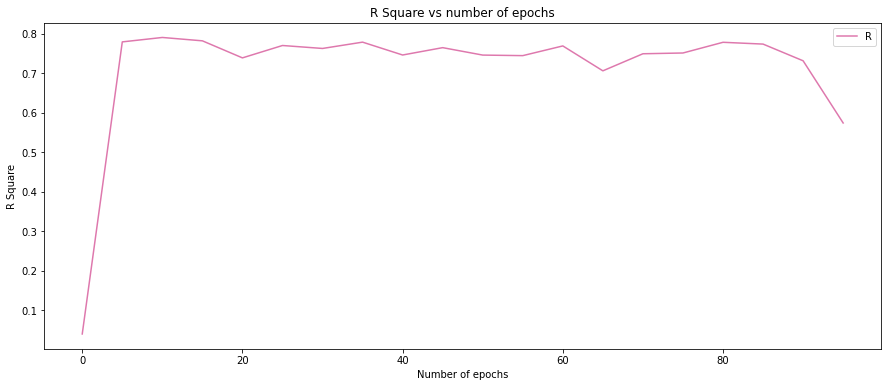

In [130]:
ris= pd.DataFrame(listaris)
ris.columns = ['mae1', 'mae2', 'r2']
ris['epoche'] = range(0,100,5)
import matplotlib.pyplot as plt
plt.plot(ris['epoche'], ris['r2'], label = "R", color='#de78ad')
plt.title("R Square vs number of epochs")
plt.ylabel("R Square")
plt.xlabel("Number of epochs")
plt.legend()
plt.rcParams["figure.figsize"] = (15,6)

In [131]:
keras.utils.set_random_seed(84)
model.fit(x_train, y_train, epochs = 5, batch_size = 1, verbose = 1)

Epoch 1/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2240 - mae: 0.2240 - r2_keras: -1330324.1250
Epoch 2/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2245 - mae: 0.2245 - r2_keras: -1330587.5000
Epoch 3/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2231 - mae: 0.2231 - r2_keras: -1333680.6250
Epoch 4/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2241 - mae: 0.2241 - r2_keras: -1327051.2500
Epoch 5/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2221 - mae: 0.2221 - r2_keras: -1313909.6250


In [132]:
mae, mae, r2 = model.evaluate(x_test, y_test, verbose = 0)
print(mae, r2)

0.2372422069311142 0.7874437570571899


37/37 [==============================] - 0s 1ms/step


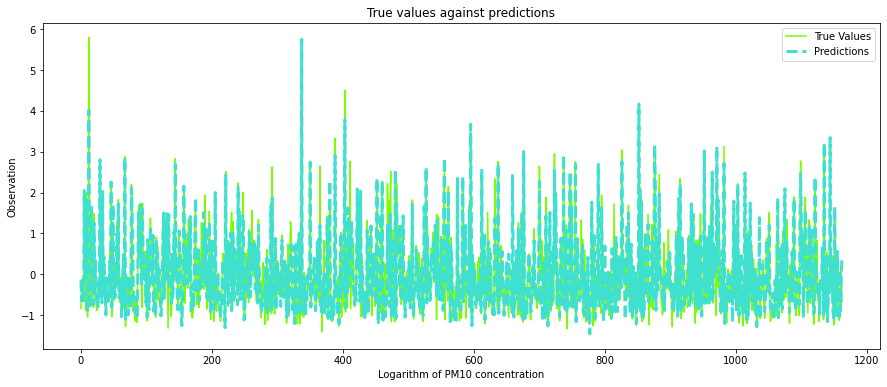

In [134]:
import matplotlib.pyplot as plt
plt.plot(list(y_test), label = "True Values", color='lawngreen')
supersimple_pred = model.predict(x_test)
plt.plot(supersimple_pred,  label = "Predictions", color='turquoise', linestyle='--',linewidth=3.0)
#plt.plot(list(y_test), label = "Valori Osservati", color='lawngreen')
plt.title("True values against predictions")
#plt.hlines(y=50, xmin=18620, xmax=18620+380, colors='red', linestyles='-', lw=2, label='PM10 daily threshold')
plt.ylabel("Observation")
plt.xlabel("Logarithm of PM10 concentration")
plt.legend()
plt.rcParams["figure.figsize"] = (15,6)

Modello numero 2

In [124]:
keras.utils.set_random_seed(84)
model = models.Sequential()
model.add(layers.Dense(64, activation ='relu', input_shape = (x_train.shape[1],)))
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'rmsprop', loss='mae', metrics=['mae',r2_keras])

In [91]:
keras.utils.set_random_seed(84)
listaris=[]
for i in range(0,100,5):
    model.fit(x_train, y_train, epochs = i, batch_size = 1, verbose = 1)
    listaris.append(model.evaluate(x_test, y_test, verbose = 0))
listaris

Epoch 1/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3206 - mae: 0.3206 - r2_keras: -2654629.2500
Epoch 2/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2846 - mae: 0.2846 - r2_keras: -2557183.0000
Epoch 3/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2649 - mae: 0.2649 - r2_keras: -2165362.7500
Epoch 4/5
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2596 - mae: 0.2596 - r2_keras: -2225051.0000
Epoch 5/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2509 - mae: 0.2509 - r2_keras: -1897490.3750
Epoch 1/10
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2464 - mae: 0.2464 - r2_keras: -1688301.0000
Epoch 2/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2431 - mae: 0.2431 - r2_keras: -1621814.2500
Epoch 3/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2434 - mae: 0.2434 - r2_keras: -1663318.2500
Epoch 4/10
2711/2711 

2711/2711 [==============================] - 3s 1ms/step - loss: 0.2145 - mae: 0.2145 - r2_keras: -1319755.5000
Epoch 18/25
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2151 - mae: 0.2151 - r2_keras: -1316260.5000
Epoch 19/25
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2157 - mae: 0.2157 - r2_keras: -1345430.3750
Epoch 20/25
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2136 - mae: 0.2136 - r2_keras: -1302011.0000
Epoch 21/25
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2123 - mae: 0.2123 - r2_keras: -1314735.5000
Epoch 22/25
2711/2711 [==============================] - 4s 2ms/step - loss: 0.2135 - mae: 0.2135 - r2_keras: -1347950.3750
Epoch 23/25
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2129 - mae: 0.2129 - r2_keras: -1291022.5000
Epoch 24/25
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2140 - mae: 0.2140 - r2_keras: -1311554.6250
Epoch 25/25
2711/271

2711/2711 [==============================] - 4s 1ms/step - loss: 0.2055 - mae: 0.2055 - r2_keras: -1317388.5000
Epoch 29/35
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2031 - mae: 0.2031 - r2_keras: -1234409.1250
Epoch 30/35
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2038 - mae: 0.2038 - r2_keras: -1282430.8750
Epoch 31/35
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2062 - mae: 0.2062 - r2_keras: -1257160.5000
Epoch 32/35
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2033 - mae: 0.2033 - r2_keras: -1244310.5000
Epoch 33/35
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2031 - mae: 0.2031 - r2_keras: -1189880.6250
Epoch 34/35
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2050 - mae: 0.2050 - r2_keras: -1408828.0000
Epoch 35/35
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2052 - mae: 0.2052 - r2_keras: -1286941.1250
Epoch 1/40
2711/2711

2711/2711 [==============================] - 3s 1ms/step - loss: 0.1958 - mae: 0.1958 - r2_keras: -1119852.5000
Epoch 20/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1942 - mae: 0.1942 - r2_keras: -1075700.2500
Epoch 21/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1986 - mae: 0.1986 - r2_keras: -1220030.3750
Epoch 22/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1966 - mae: 0.1966 - r2_keras: -1134046.2500
Epoch 23/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1970 - mae: 0.1970 - r2_keras: -1131619.1250
Epoch 24/45
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1971 - mae: 0.1971 - r2_keras: -1146163.3750
Epoch 25/45
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1986 - mae: 0.1986 - r2_keras: -1152135.2500
Epoch 26/45
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1960 - mae: 0.1960 - r2_keras: -1217838.5000
Epoch 27/45
2711/271

2711/2711 [==============================] - 3s 1ms/step - loss: 0.1927 - mae: 0.1927 - r2_keras: -1239974.5000
Epoch 41/50
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1926 - mae: 0.1926 - r2_keras: -1074358.2500
Epoch 42/50
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1929 - mae: 0.1929 - r2_keras: -1078905.3750
Epoch 43/50
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1976 - mae: 0.1976 - r2_keras: -1170455.1250
Epoch 44/50
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1953 - mae: 0.1953 - r2_keras: -1100959.5000
Epoch 45/50
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1950 - mae: 0.1950 - r2_keras: -1188753.6250
Epoch 46/50
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1955 - mae: 0.1955 - r2_keras: -1140739.2500
Epoch 47/50
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1957 - mae: 0.1957 - r2_keras: -1116440.5000
Epoch 48/50
2711/271

2711/2711 [==============================] - 3s 1ms/step - loss: 0.1913 - mae: 0.1913 - r2_keras: -1087709.5000
Epoch 2/60
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1939 - mae: 0.1939 - r2_keras: -1118214.3750
Epoch 3/60
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1963 - mae: 0.1963 - r2_keras: -1208672.1250
Epoch 4/60
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1953 - mae: 0.1953 - r2_keras: -1235172.0000
Epoch 5/60
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1888 - mae: 0.1888 - r2_keras: -1038230.8750
Epoch 6/60
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1973 - mae: 0.1973 - r2_keras: -1308344.3750
Epoch 7/60
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1939 - mae: 0.1939 - r2_keras: -1303786.5000
Epoch 8/60
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1926 - mae: 0.1926 - r2_keras: -1149754.8750
Epoch 9/60
2711/2711 [=====

2711/2711 [==============================] - 3s 1ms/step - loss: 0.1907 - mae: 0.1907 - r2_keras: -1060455.2500
Epoch 8/65
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1942 - mae: 0.1942 - r2_keras: -1342852.0000
Epoch 9/65
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1900 - mae: 0.1900 - r2_keras: -1056960.8750
Epoch 10/65
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1884 - mae: 0.1884 - r2_keras: -1046021.3125
Epoch 11/65
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1913 - mae: 0.1913 - r2_keras: -1038990.1875
Epoch 12/65
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1930 - mae: 0.1930 - r2_keras: -1155936.3750
Epoch 13/65
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1892 - mae: 0.1892 - r2_keras: -1095568.5000
Epoch 14/65
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1927 - mae: 0.1927 - r2_keras: -1099796.2500
Epoch 15/65
2711/2711 

2711/2711 [==============================] - 3s 1ms/step - loss: 0.1944 - mae: 0.1944 - r2_keras: -1153868.3750
Epoch 9/70
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1938 - mae: 0.1938 - r2_keras: -1181978.1250
Epoch 10/70
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1905 - mae: 0.1905 - r2_keras: -1047262.7500
Epoch 11/70
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1899 - mae: 0.1899 - r2_keras: -1063328.0000
Epoch 12/70
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1956 - mae: 0.1956 - r2_keras: -1480131.6250
Epoch 13/70
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1949 - mae: 0.1949 - r2_keras: -1478414.8750
Epoch 14/70
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1921 - mae: 0.1921 - r2_keras: -1176651.8750
Epoch 15/70
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1928 - mae: 0.1928 - r2_keras: -1228353.7500
Epoch 16/70
2711/2711

2711/2711 [==============================] - 4s 1ms/step - loss: 0.1884 - mae: 0.1884 - r2_keras: -1000636.5000
Epoch 5/75
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1891 - mae: 0.1891 - r2_keras: -1115066.7500
Epoch 6/75
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1870 - mae: 0.1870 - r2_keras: -1041097.3125
Epoch 7/75
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1868 - mae: 0.1868 - r2_keras: -985652.3125
Epoch 8/75
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1881 - mae: 0.1881 - r2_keras: -1011416.0625
Epoch 9/75
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1889 - mae: 0.1889 - r2_keras: -1011176.1250
Epoch 10/75
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1838 - mae: 0.1838 - r2_keras: -976815.7500
Epoch 11/75
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1857 - mae: 0.1857 - r2_keras: -983315.0000
Epoch 12/75
2711/2711 [=====

2711/2711 [==============================] - 3s 1ms/step - loss: 0.1887 - mae: 0.1887 - r2_keras: -1057436.7500
Epoch 71/75
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1891 - mae: 0.1891 - r2_keras: -1058157.6250
Epoch 72/75
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1876 - mae: 0.1876 - r2_keras: -1014616.6875
Epoch 73/75
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1891 - mae: 0.1891 - r2_keras: -1047702.8750
Epoch 74/75
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1886 - mae: 0.1886 - r2_keras: -1066452.1250
Epoch 75/75
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1899 - mae: 0.1899 - r2_keras: -1110256.0000
Epoch 1/80
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1878 - mae: 0.1878 - r2_keras: -1024433.6250
Epoch 2/80
2711/2711 [==============================] - 4s 2ms/step - loss: 0.1883 - mae: 0.1883 - r2_keras: -1072920.3750
Epoch 3/80
2711/2711 [

2711/2711 [==============================] - 4s 1ms/step - loss: 0.1891 - mae: 0.1891 - r2_keras: -1124567.2500
Epoch 62/80
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1882 - mae: 0.1882 - r2_keras: -1119493.2500
Epoch 63/80
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1898 - mae: 0.1898 - r2_keras: -1250311.6250
Epoch 64/80
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1896 - mae: 0.1896 - r2_keras: -1124390.7500
Epoch 65/80
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1852 - mae: 0.1852 - r2_keras: -988354.0625
Epoch 66/80
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1871 - mae: 0.1871 - r2_keras: -1108294.7500
Epoch 67/80
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1887 - mae: 0.1887 - r2_keras: -1017039.1875
Epoch 68/80
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1867 - mae: 0.1867 - r2_keras: -1023730.3125
Epoch 69/80
2711/2711

2711/2711 [==============================] - 4s 1ms/step - loss: 0.1884 - mae: 0.1884 - r2_keras: -1459337.8750
Epoch 48/85
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1887 - mae: 0.1887 - r2_keras: -1296248.0000
Epoch 49/85
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1805 - mae: 0.1805 - r2_keras: -990524.5000
Epoch 50/85
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1869 - mae: 0.1869 - r2_keras: -1112075.7500
Epoch 51/85
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1864 - mae: 0.1864 - r2_keras: -997206.0000
Epoch 52/85
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1869 - mae: 0.1869 - r2_keras: -1005898.6875
Epoch 53/85
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1885 - mae: 0.1885 - r2_keras: -1347346.7500
Epoch 54/85
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1927 - mae: 0.1927 - r2_keras: -1501191.6250
Epoch 55/85
2711/2711 

2711/2711 [==============================] - 4s 1ms/step - loss: 0.1880 - mae: 0.1880 - r2_keras: -1278502.5000
Epoch 29/90
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1834 - mae: 0.1834 - r2_keras: -1141895.6250
Epoch 30/90
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1865 - mae: 0.1865 - r2_keras: -1303447.5000
Epoch 31/90
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1846 - mae: 0.1846 - r2_keras: -1021740.6875
Epoch 32/90
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1856 - mae: 0.1856 - r2_keras: -1253456.5000
Epoch 33/90
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1887 - mae: 0.1887 - r2_keras: -1273931.5000
Epoch 34/90
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1858 - mae: 0.1858 - r2_keras: -1101724.5000
Epoch 35/90
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1873 - mae: 0.1873 - r2_keras: -1182590.8750
Epoch 36/90
2711/271

2711/2711 [==============================] - 3s 1ms/step - loss: 0.1838 - mae: 0.1838 - r2_keras: -1013585.7500
Epoch 5/95
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1866 - mae: 0.1866 - r2_keras: -1096443.5000
Epoch 6/95
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1845 - mae: 0.1845 - r2_keras: -973674.8125
Epoch 7/95
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1884 - mae: 0.1884 - r2_keras: -1074404.6250
Epoch 8/95
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1877 - mae: 0.1877 - r2_keras: -1493400.0000
Epoch 9/95
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1884 - mae: 0.1884 - r2_keras: -1584459.1250
Epoch 10/95
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1842 - mae: 0.1842 - r2_keras: -1015599.1250
Epoch 11/95
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1899 - mae: 0.1899 - r2_keras: -1283585.7500
Epoch 12/95
2711/2711 [===

2711/2711 [==============================] - 3s 1ms/step - loss: 0.1861 - mae: 0.1861 - r2_keras: -1153897.6250
Epoch 71/95
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1846 - mae: 0.1846 - r2_keras: -1175670.0000
Epoch 72/95
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1859 - mae: 0.1859 - r2_keras: -1167847.5000
Epoch 73/95
2711/2711 [==============================] - 4s 1ms/step - loss: 0.1845 - mae: 0.1845 - r2_keras: -1020817.8750
Epoch 74/95
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1860 - mae: 0.1860 - r2_keras: -1105988.5000
Epoch 75/95
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1842 - mae: 0.1842 - r2_keras: -1026762.0625
Epoch 76/95
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1863 - mae: 0.1863 - r2_keras: -1244972.2500
Epoch 77/95
2711/2711 [==============================] - 3s 1ms/step - loss: 0.1870 - mae: 0.1870 - r2_keras: -1193077.6250
Epoch 78/95
2711/271

[[0.7267305850982666, 0.7267305850982666, 0.03951622545719147],
 [0.24355041980743408, 0.24355041980743408, 0.7797102332115173],
 [0.2413281798362732, 0.2413281798362732, 0.79091876745224],
 [0.2413342446088791, 0.2413342446088791, 0.7823957204818726],
 [0.2628304362297058, 0.2628304362297058, 0.7391869425773621],
 [0.24559518694877625, 0.24559518694877625, 0.7705547213554382],
 [0.25946664810180664, 0.25946664810180664, 0.7630724310874939],
 [0.2567618489265442, 0.2567618489265442, 0.7790723443031311],
 [0.2665560841560364, 0.2665560841560364, 0.7464730739593506],
 [0.269554078578949, 0.269554078578949, 0.7651033401489258],
 [0.2639910876750946, 0.2639910876750946, 0.7462717890739441],
 [0.27478787302970886, 0.27478787302970886, 0.7448813319206238],
 [0.2644399404525757, 0.2644399404525757, 0.7694724798202515],
 [0.2791144847869873, 0.2791144847869873, 0.7063730359077454],
 [0.27054715156555176, 0.27054715156555176, 0.7496318221092224],
 [0.27910852432250977, 0.27910852432250977, 0.75

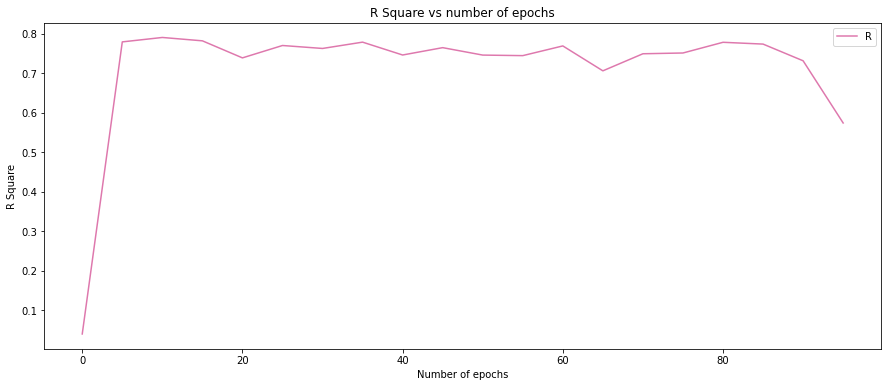

In [101]:
ris= pd.DataFrame(listaris)
ris.columns = ['mae1', 'mae2', 'r2']
ris['epoche'] = range(0,100,5)
import matplotlib.pyplot as plt
plt.plot(ris['epoche'], ris['r2'], label = "R", color='#de78ad')
plt.title("R Square vs number of epochs")
plt.ylabel("R Square")
plt.xlabel("Number of epochs")
plt.legend()
plt.rcParams["figure.figsize"] = (15,6)

In [135]:
keras.utils.set_random_seed(84)
model.fit(x_train, y_train, epochs = 5, batch_size = 1, verbose = 1)

Epoch 1/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2235 - mae: 0.2235 - r2_keras: -1321721.6250
Epoch 2/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2242 - mae: 0.2242 - r2_keras: -1332581.3750
Epoch 3/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2235 - mae: 0.2235 - r2_keras: -1327018.8750
Epoch 4/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2246 - mae: 0.2246 - r2_keras: -1325077.0000
Epoch 5/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2231 - mae: 0.2231 - r2_keras: -1339995.7500


In [136]:
mae, mae, r2 = model.evaluate(x_test, y_test, verbose = 0)
print(mae, r2)

0.2362438440322876 0.794519305229187


37/37 [==============================] - 0s 1ms/step


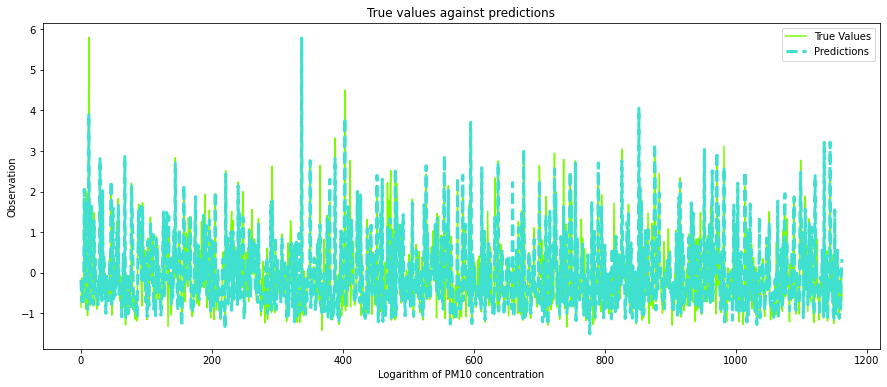

In [137]:
import matplotlib.pyplot as plt
plt.plot(list(y_test), label = "True Values", color='lawngreen')
simple_pred = model.predict(x_test)
plt.plot(simple_pred,  label = "Predictions", color='turquoise', linestyle='--',linewidth=3.0)
#plt.plot(list(y_test), label = "Valori Osservati", color='lawngreen')
plt.title("True values against predictions")
#plt.hlines(y=50, xmin=18620, xmax=18620+380, colors='red', linestyles='-', lw=2, label='PM10 daily threshold')
plt.ylabel("Observation")
plt.xlabel("Logarithm of PM10 concentration")
plt.legend()
plt.rcParams["figure.figsize"] = (15,6)

Miglioriamo il modello mantenedo una densenet

In [120]:
keras.utils.set_random_seed(4)
model = models.Sequential()
model.add(layers.Dense(64, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))

model.add(layers.Dense(1, kernel_initializer='normal', activation='linear'))

model.compile(optimizer = 'rmsprop', loss='mean_absolute_error', metrics=['mae',r2_keras])

In [103]:
keras.utils.set_random_seed(4)
listaris_medium=[]
for i in range(0,100,5):
    model.fit(x_train, y_train, epochs = i, batch_size = 1, verbose = 1)
    listaris_medium.append(model.evaluate(x_test, y_test, verbose = 0))
listaris_medium

Epoch 1/5
2711/2711 [==============================] - 5s 2ms/step - loss: 0.3546 - mae: 0.3546 - r2_keras: -3368431.2500
Epoch 2/5
2711/2711 [==============================] - 5s 2ms/step - loss: 0.3003 - mae: 0.3003 - r2_keras: -2355092.2500
Epoch 3/5
2711/2711 [==============================] - 5s 2ms/step - loss: 0.2807 - mae: 0.2807 - r2_keras: -2083931.3750
Epoch 4/5
2711/2711 [==============================] - 5s 2ms/step - loss: 0.2707 - mae: 0.2707 - r2_keras: -1808492.2500
Epoch 5/5
2711/2711 [==============================] - 5s 2ms/step - loss: 0.2669 - mae: 0.2669 - r2_keras: -1822866.8750
Epoch 1/10
2711/2711 [==============================] - 5s 2ms/step - loss: 0.2630 - mae: 0.2630 - r2_keras: -1741855.7500
Epoch 2/10
2711/2711 [==============================] - 7s 2ms/step - loss: 0.2579 - mae: 0.2579 - r2_keras: -1675892.0000
Epoch 3/10
2711/2711 [==============================] - 6s 2ms/step - loss: 0.2541 - mae: 0.2541 - r2_keras: -1637590.8750
Epoch 4/10
2711/2711 

2711/2711 [==============================] - 5s 2ms/step - loss: 0.2119 - mae: 0.2119 - r2_keras: -1309089.0000
Epoch 18/25
2711/2711 [==============================] - 5s 2ms/step - loss: 0.2102 - mae: 0.2102 - r2_keras: -1286737.7500
Epoch 19/25
2711/2711 [==============================] - 5s 2ms/step - loss: 0.2056 - mae: 0.2056 - r2_keras: -1178768.3750
Epoch 20/25
2711/2711 [==============================] - 6s 2ms/step - loss: 0.2054 - mae: 0.2054 - r2_keras: -1206025.1250
Epoch 21/25
2711/2711 [==============================] - 5s 2ms/step - loss: 0.2078 - mae: 0.2078 - r2_keras: -1241772.5000
Epoch 22/25
2711/2711 [==============================] - 5s 2ms/step - loss: 0.2052 - mae: 0.2052 - r2_keras: -1192797.2500
Epoch 23/25
2711/2711 [==============================] - 5s 2ms/step - loss: 0.2064 - mae: 0.2064 - r2_keras: -1206956.2500
Epoch 24/25
2711/2711 [==============================] - 5s 2ms/step - loss: 0.2066 - mae: 0.2066 - r2_keras: -1228911.0000
Epoch 25/25
2711/271

2711/2711 [==============================] - 5s 2ms/step - loss: 0.1873 - mae: 0.1873 - r2_keras: -1029602.6250
Epoch 29/35
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1860 - mae: 0.1860 - r2_keras: -988748.7500
Epoch 30/35
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1894 - mae: 0.1894 - r2_keras: -1036277.8750
Epoch 31/35
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1814 - mae: 0.1814 - r2_keras: -983237.5625
Epoch 32/35
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1881 - mae: 0.1881 - r2_keras: -1060305.0000
Epoch 33/35
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1870 - mae: 0.1870 - r2_keras: -1014708.1875
Epoch 34/35
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1859 - mae: 0.1859 - r2_keras: -1030219.9375
Epoch 35/35
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1839 - mae: 0.1839 - r2_keras: -991161.4375
Epoch 1/40
2711/2711 [=

2711/2711 [==============================] - 5s 2ms/step - loss: 0.1683 - mae: 0.1683 - r2_keras: -817256.1875
Epoch 20/45
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1690 - mae: 0.1690 - r2_keras: -817255.1250
Epoch 21/45
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1735 - mae: 0.1735 - r2_keras: -891112.8750
Epoch 22/45
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1741 - mae: 0.1741 - r2_keras: -952406.1875
Epoch 23/45
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1713 - mae: 0.1713 - r2_keras: -862512.4375
Epoch 24/45
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1725 - mae: 0.1725 - r2_keras: -899071.1250
Epoch 25/45
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1729 - mae: 0.1729 - r2_keras: -880192.3125
Epoch 26/45
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1725 - mae: 0.1725 - r2_keras: -905839.2500
Epoch 27/45
2711/2711 [=====

2711/2711 [==============================] - 6s 2ms/step - loss: 0.1628 - mae: 0.1628 - r2_keras: -846606.2500
Epoch 41/50
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1629 - mae: 0.1629 - r2_keras: -792398.5625
Epoch 42/50
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1620 - mae: 0.1620 - r2_keras: -771218.7500
Epoch 43/50
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1614 - mae: 0.1614 - r2_keras: -861506.3750
Epoch 44/50
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1586 - mae: 0.1586 - r2_keras: -822424.8125
Epoch 45/50
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1608 - mae: 0.1608 - r2_keras: -847717.8125
Epoch 46/50
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1568 - mae: 0.1568 - r2_keras: -737051.1250
Epoch 47/50
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1605 - mae: 0.1605 - r2_keras: -852761.5000
Epoch 48/50
2711/2711 [=====

2711/2711 [==============================] - 5s 2ms/step - loss: 0.1507 - mae: 0.1507 - r2_keras: -722768.8750
Epoch 2/60
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1533 - mae: 0.1533 - r2_keras: -736092.7500
Epoch 3/60
2711/2711 [==============================] - 7s 2ms/step - loss: 0.1523 - mae: 0.1523 - r2_keras: -706449.9375
Epoch 4/60
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1558 - mae: 0.1558 - r2_keras: -760522.2500
Epoch 5/60
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1527 - mae: 0.1527 - r2_keras: -693609.3750
Epoch 6/60
2711/2711 [==============================] - 7s 2ms/step - loss: 0.1511 - mae: 0.1511 - r2_keras: -671561.6250
Epoch 7/60
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1542 - mae: 0.1542 - r2_keras: -688295.1875
Epoch 8/60
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1528 - mae: 0.1528 - r2_keras: -712760.6250
Epoch 9/60
2711/2711 [=============

2711/2711 [==============================] - 6s 2ms/step - loss: 0.1510 - mae: 0.1510 - r2_keras: -694641.3125
Epoch 8/65
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1533 - mae: 0.1533 - r2_keras: -667319.3125
Epoch 9/65
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1468 - mae: 0.1468 - r2_keras: -629200.8125
Epoch 10/65
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1501 - mae: 0.1501 - r2_keras: -676682.9375
Epoch 11/65
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1485 - mae: 0.1485 - r2_keras: -624349.9375
Epoch 12/65
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1496 - mae: 0.1496 - r2_keras: -639336.3125
Epoch 13/65
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1489 - mae: 0.1489 - r2_keras: -621170.2500
Epoch 14/65
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1494 - mae: 0.1494 - r2_keras: -656444.7500
Epoch 15/65
2711/2711 [=======

2711/2711 [==============================] - 6s 2ms/step - loss: 0.1436 - mae: 0.1436 - r2_keras: -597337.6875
Epoch 9/70
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1424 - mae: 0.1424 - r2_keras: -604176.5625
Epoch 10/70
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1426 - mae: 0.1426 - r2_keras: -615611.7500
Epoch 11/70
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1399 - mae: 0.1399 - r2_keras: -542728.0000
Epoch 12/70
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1457 - mae: 0.1457 - r2_keras: -713995.6250
Epoch 13/70
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1445 - mae: 0.1445 - r2_keras: -635935.4375
Epoch 14/70
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1429 - mae: 0.1429 - r2_keras: -594332.6250
Epoch 15/70
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1434 - mae: 0.1434 - r2_keras: -611699.5625
Epoch 16/70
2711/2711 [======

2711/2711 [==============================] - 6s 2ms/step - loss: 0.1376 - mae: 0.1376 - r2_keras: -537478.0625
Epoch 5/75
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1408 - mae: 0.1408 - r2_keras: -560414.9375
Epoch 6/75
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1416 - mae: 0.1416 - r2_keras: -576857.2500
Epoch 7/75
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1430 - mae: 0.1430 - r2_keras: -636184.1875
Epoch 8/75
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1392 - mae: 0.1392 - r2_keras: -581837.3125
Epoch 9/75
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1389 - mae: 0.1389 - r2_keras: -603791.6250
Epoch 10/75
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1409 - mae: 0.1409 - r2_keras: -574924.6250
Epoch 11/75
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1347 - mae: 0.1347 - r2_keras: -541033.3125
Epoch 12/75
2711/2711 [==========

2711/2711 [==============================] - 5s 2ms/step - loss: 0.1387 - mae: 0.1387 - r2_keras: -590565.3750
Epoch 71/75
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1376 - mae: 0.1376 - r2_keras: -527944.1250
Epoch 72/75
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1365 - mae: 0.1365 - r2_keras: -560568.0625
Epoch 73/75
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1345 - mae: 0.1345 - r2_keras: -564606.1250
Epoch 74/75
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1379 - mae: 0.1379 - r2_keras: -742057.5625
Epoch 75/75
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1320 - mae: 0.1320 - r2_keras: -501287.7500
Epoch 1/80
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1346 - mae: 0.1346 - r2_keras: -581177.1250
Epoch 2/80
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1349 - mae: 0.1349 - r2_keras: -577196.8750
Epoch 3/80
2711/2711 [========

2711/2711 [==============================] - 5s 2ms/step - loss: 0.1367 - mae: 0.1367 - r2_keras: -570184.3125
Epoch 62/80
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1370 - mae: 0.1370 - r2_keras: -616877.5000
Epoch 63/80
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1338 - mae: 0.1338 - r2_keras: -514406.5625
Epoch 64/80
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1341 - mae: 0.1341 - r2_keras: -556354.5625
Epoch 65/80
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1365 - mae: 0.1365 - r2_keras: -594733.3750
Epoch 66/80
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1360 - mae: 0.1360 - r2_keras: -627028.0625
Epoch 67/80
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1345 - mae: 0.1345 - r2_keras: -505229.5938
Epoch 68/80
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1353 - mae: 0.1353 - r2_keras: -560980.0625
Epoch 69/80
2711/2711 [=====

2711/2711 [==============================] - 5s 2ms/step - loss: 0.1333 - mae: 0.1333 - r2_keras: -524957.6875
Epoch 48/85
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1352 - mae: 0.1352 - r2_keras: -620241.9375
Epoch 49/85
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1307 - mae: 0.1307 - r2_keras: -549253.0000
Epoch 50/85
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1311 - mae: 0.1311 - r2_keras: -528351.7500
Epoch 51/85
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1322 - mae: 0.1322 - r2_keras: -500090.0938
Epoch 52/85
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1339 - mae: 0.1339 - r2_keras: -622794.6250
Epoch 53/85
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1330 - mae: 0.1330 - r2_keras: -554235.3750
Epoch 54/85
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1349 - mae: 0.1349 - r2_keras: -529050.9375
Epoch 55/85
2711/2711 [=====

2711/2711 [==============================] - 5s 2ms/step - loss: 0.1324 - mae: 0.1324 - r2_keras: -471521.5000
Epoch 29/90
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1324 - mae: 0.1324 - r2_keras: -534419.0000
Epoch 30/90
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1327 - mae: 0.1327 - r2_keras: -845013.0625
Epoch 31/90
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1303 - mae: 0.1303 - r2_keras: -493928.0625
Epoch 32/90
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1337 - mae: 0.1337 - r2_keras: -569845.9375
Epoch 33/90
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1382 - mae: 0.1382 - r2_keras: -913059.3750
Epoch 34/90
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1304 - mae: 0.1304 - r2_keras: -463676.9688
Epoch 35/90
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1310 - mae: 0.1310 - r2_keras: -493776.2188
Epoch 36/90
2711/2711 [=====

2711/2711 [==============================] - 5s 2ms/step - loss: 0.1280 - mae: 0.1280 - r2_keras: -450199.9062
Epoch 5/95
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1323 - mae: 0.1323 - r2_keras: -460522.6562
Epoch 6/95
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1302 - mae: 0.1302 - r2_keras: -553140.5625
Epoch 7/95
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1299 - mae: 0.1299 - r2_keras: -501938.2500
Epoch 8/95
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1324 - mae: 0.1324 - r2_keras: -580837.8125
Epoch 9/95
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1321 - mae: 0.1321 - r2_keras: -555445.0000
Epoch 10/95
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1316 - mae: 0.1316 - r2_keras: -465335.7188
Epoch 11/95
2711/2711 [==============================] - 5s 2ms/step - loss: 0.1312 - mae: 0.1312 - r2_keras: -524945.6875
Epoch 12/95
2711/2711 [==========

2711/2711 [==============================] - 6s 2ms/step - loss: 0.1397 - mae: 0.1397 - r2_keras: -790347.6250
Epoch 71/95
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1343 - mae: 0.1343 - r2_keras: -556773.6250
Epoch 72/95
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1371 - mae: 0.1371 - r2_keras: -600743.6250
Epoch 73/95
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1343 - mae: 0.1343 - r2_keras: -521245.2812
Epoch 74/95
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1328 - mae: 0.1328 - r2_keras: -483453.5312
Epoch 75/95
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1334 - mae: 0.1334 - r2_keras: -510540.5312
Epoch 76/95
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1387 - mae: 0.1387 - r2_keras: -633753.0625
Epoch 77/95
2711/2711 [==============================] - 6s 2ms/step - loss: 0.1350 - mae: 0.1350 - r2_keras: -708492.2500
Epoch 78/95
2711/2711 [=====

[[0.756405770778656, 0.756405770778656, -0.06882724165916443],
 [0.25132229924201965, 0.25132229924201965, 0.7766412496566772],
 [0.23869608342647552, 0.23869608342647552, 0.8031634092330933],
 [0.2760765254497528, 0.2760765254497528, 0.7514860033988953],
 [0.2597336769104004, 0.2597336769104004, 0.7086367607116699],
 [0.26174798607826233, 0.26174798607826233, 0.7919340133666992],
 [0.26012730598449707, 0.26012730598449707, 0.7790845632553101],
 [0.25402116775512695, 0.25402116775512695, 0.7780261635780334],
 [0.2658819854259491, 0.2658819854259491, 0.7681645154953003],
 [0.26885074377059937, 0.26885074377059937, 0.7475484013557434],
 [0.27300065755844116, 0.27300065755844116, 0.7429017424583435],
 [0.2874288260936737, 0.2874288260936737, 0.7366597056388855],
 [0.2796573042869568, 0.2796573042869568, 0.744513750076294],
 [0.28931257128715515, 0.28931257128715515, 0.711012065410614],
 [0.29384684562683105, 0.29384684562683105, 0.7394677996635437],
 [0.27729758620262146, 0.27729758620262

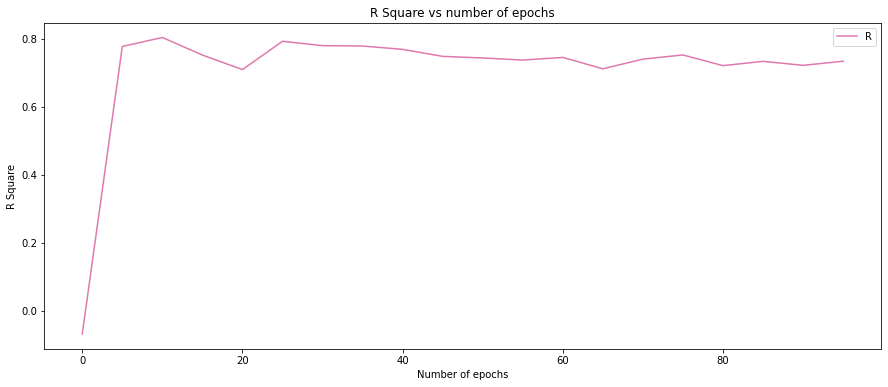

In [106]:
ris= pd.DataFrame(listaris_medium)
ris.columns = ['mae1', 'mae2', 'r2']
ris['epoche'] = range(0,100,5)
import matplotlib.pyplot as plt
plt.plot(ris['epoche'], ris['r2'], label = "R", color='#de78ad')
plt.title("R Square vs number of epochs")
plt.ylabel("R Square")
plt.xlabel("Number of epochs")
plt.legend()
plt.rcParams["figure.figsize"] = (15,6)

In [138]:
keras.utils.set_random_seed(84)
model.fit(x_train, y_train, epochs = 10, batch_size = 1, verbose = 1)

Epoch 1/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2238 - mae: 0.2238 - r2_keras: -1324032.1250
Epoch 2/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2248 - mae: 0.2248 - r2_keras: -1340817.8750
Epoch 3/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2221 - mae: 0.2221 - r2_keras: -1312526.6250
Epoch 4/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2238 - mae: 0.2238 - r2_keras: -1302230.1250
Epoch 5/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2229 - mae: 0.2229 - r2_keras: -1312239.5000
Epoch 6/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2245 - mae: 0.2245 - r2_keras: -1369216.7500
Epoch 7/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2235 - mae: 0.2235 - r2_keras: -1316609.2500
Epoch 8/10
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2232 - mae: 0.2232 - r2_keras: -1315016.2500
Epoch 9/10
2711/

In [139]:
mae, mae, r2 = model.evaluate(x_test, y_test, verbose = 0)
print(mae, r2)

0.245758056640625 0.786024272441864


37/37 [==============================] - 0s 2ms/step


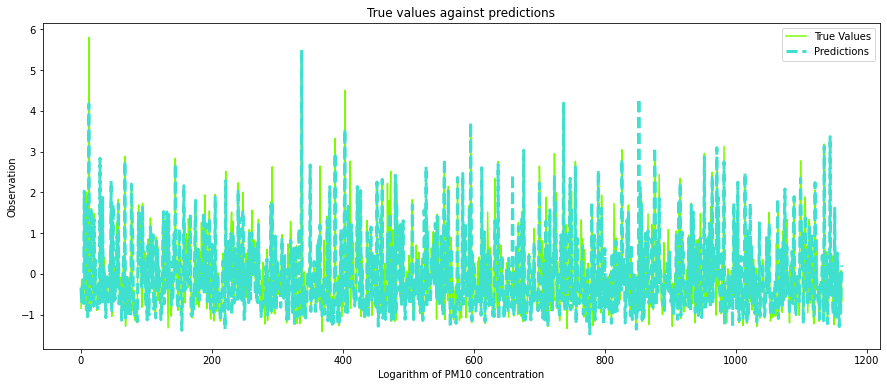

In [140]:
import matplotlib.pyplot as plt
plt.plot(list(y_test), label = "True Values", color='lawngreen')
medium_pred = model.predict(x_test)
plt.plot(medium_pred,  label = "Predictions", color='turquoise', linestyle='--',linewidth=3.0)
#plt.plot(list(y_test), label = "Valori Osservati", color='lawngreen')
plt.title("True values against predictions")
#plt.hlines(y=50, xmin=18620, xmax=18620+380, colors='red', linestyles='-', lw=2, label='PM10 daily threshold')
plt.ylabel("Observation")
plt.xlabel("Logarithm of PM10 concentration")
plt.legend()
plt.rcParams["figure.figsize"] = (15,6)

Maggior Complessità

In [110]:
keras.utils.set_random_seed(4)
model = models.Sequential()
model.add(layers.Dense(64, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

model.add(layers.Dense(512, kernel_initializer='normal',activation='sigmoid'))
model.add(layers.Dense(512, kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(512, kernel_initializer='normal',activation='sigmoid'))
#model.add(layers.Dense(64, kernel_initializer='normal',activation='relu'))
#model.add(layers.Dense(128, kernel_initializer='normal',activation='relu'))
#model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(layers.Dense(128, kernel_initializer='normal',activation='relu'))
#model.add(layers.Dense(64, kernel_initializer='normal',activation='relu'))
#model.add(layers.Dense(32, kernel_initializer='normal',activation='relu'))

model.add(layers.Dense(1, kernel_initializer='normal', activation='linear'))

model.compile(optimizer = 'rmsprop', loss='mean_absolute_error', metrics=['mae',r2_keras])

In [111]:
keras.utils.set_random_seed(4)
listaris_comp=[]
for i in range(0,40,5):
    model.fit(x_train, y_train, epochs = i, batch_size = 1, verbose = 1)
    listaris_comp.append(model.evaluate(x_test, y_test, verbose = 0))
listaris_comp

Epoch 1/5
2711/2711 [==============================] - 17s 6ms/step - loss: 0.4791 - mae: 0.4791 - r2_keras: -4553021.5000
Epoch 2/5
2711/2711 [==============================] - 17s 6ms/step - loss: 0.3838 - mae: 0.3838 - r2_keras: -2943362.0000
Epoch 3/5
2711/2711 [==============================] - 17s 6ms/step - loss: 0.3510 - mae: 0.3510 - r2_keras: -2588698.2500
Epoch 4/5
2711/2711 [==============================] - 17s 6ms/step - loss: 0.3353 - mae: 0.3353 - r2_keras: -2418965.0000
Epoch 5/5
2711/2711 [==============================] - 17s 6ms/step - loss: 0.3306 - mae: 0.3306 - r2_keras: -2354733.0000
Epoch 1/10
2711/2711 [==============================] - 17s 6ms/step - loss: 0.3217 - mae: 0.3217 - r2_keras: -2241966.2500
Epoch 2/10
2711/2711 [==============================] - 17s 6ms/step - loss: 0.3177 - mae: 0.3177 - r2_keras: -2220277.7500
Epoch 3/10
2711/2711 [==============================] - 17s 6ms/step - loss: 0.3082 - mae: 0.3082 - r2_keras: -2096965.7500
Epoch 4/10
27

2711/2711 [==============================] - 18s 7ms/step - loss: 0.2264 - mae: 0.2264 - r2_keras: -1381640.8750
Epoch 17/25
2711/2711 [==============================] - 20s 7ms/step - loss: 0.2277 - mae: 0.2277 - r2_keras: -1383838.7500
Epoch 18/25
2711/2711 [==============================] - 22s 8ms/step - loss: 0.2280 - mae: 0.2280 - r2_keras: -1365242.7500
Epoch 19/25
2711/2711 [==============================] - 24s 9ms/step - loss: 0.2287 - mae: 0.2287 - r2_keras: -1361656.8750
Epoch 20/25
2711/2711 [==============================] - 24s 9ms/step - loss: 0.2265 - mae: 0.2265 - r2_keras: -1306795.5000
Epoch 21/25
2711/2711 [==============================] - 25s 9ms/step - loss: 0.2273 - mae: 0.2273 - r2_keras: -1354172.6250
Epoch 22/25
2711/2711 [==============================] - 24s 9ms/step - loss: 0.2289 - mae: 0.2289 - r2_keras: -1455688.6250
Epoch 23/25
2711/2711 [==============================] - 21s 8ms/step - loss: 0.2278 - mae: 0.2278 - r2_keras: -1429161.8750
Epoch 24/25


2711/2711 [==============================] - 17s 6ms/step - loss: 0.2146 - mae: 0.2146 - r2_keras: -1394130.6250
Epoch 27/35
2711/2711 [==============================] - 18s 7ms/step - loss: 0.2096 - mae: 0.2096 - r2_keras: -1343451.5000
Epoch 28/35
2711/2711 [==============================] - 19s 7ms/step - loss: 0.2117 - mae: 0.2117 - r2_keras: -1363576.5000
Epoch 29/35
2711/2711 [==============================] - 18s 6ms/step - loss: 0.2132 - mae: 0.2132 - r2_keras: -1345736.7500
Epoch 30/35
2711/2711 [==============================] - 21s 8ms/step - loss: 0.2122 - mae: 0.2122 - r2_keras: -1357437.1250
Epoch 31/35
2711/2711 [==============================] - 18s 7ms/step - loss: 0.2123 - mae: 0.2123 - r2_keras: -1367524.3750
Epoch 32/35
2711/2711 [==============================] - 17s 6ms/step - loss: 0.2132 - mae: 0.2132 - r2_keras: -1384257.5000
Epoch 33/35
2711/2711 [==============================] - 18s 7ms/step - loss: 0.2117 - mae: 0.2117 - r2_keras: -1372383.3750
Epoch 34/35


[[0.9231306314468384, 0.9231306314468384, -0.406247615814209],
 [0.2979138195514679, 0.2979138195514679, 0.7630935907363892],
 [0.26053762435913086, 0.26053762435913086, 0.7711119651794434],
 [0.2604639530181885, 0.2604639530181885, 0.7717151641845703],
 [0.24923181533813477, 0.24923181533813477, 0.7912134528160095],
 [0.2517364025115967, 0.2517364025115967, 0.7862220406532288],
 [0.24185487627983093, 0.24185487627983093, 0.7669360041618347],
 [0.24401506781578064, 0.24401506781578064, 0.7774670124053955]]

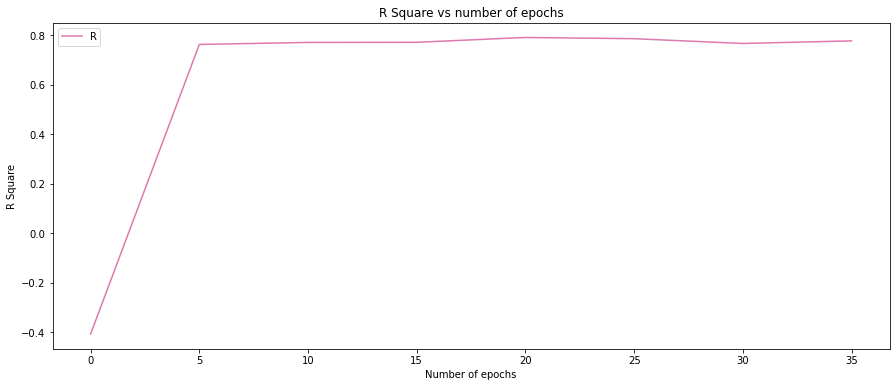

In [113]:
ris= pd.DataFrame(listaris_comp)
ris.columns = ['mae1', 'mae2', 'r2']
ris['epoche'] = range(0,40,5)
import matplotlib.pyplot as plt
plt.plot(ris['epoche'], ris['r2'], label = "R", color='#de78ad')
plt.title("R Square vs number of epochs")
plt.ylabel("R Square")
plt.xlabel("Number of epochs")
plt.legend()
plt.rcParams["figure.figsize"] = (15,6)

In [141]:
keras.utils.set_random_seed(84)
model.fit(x_train, y_train, epochs = 5, batch_size = 1, verbose = 1)

Epoch 1/5
2711/2711 [==============================] - 7s 2ms/step - loss: 0.2232 - mae: 0.2232 - r2_keras: -1343932.6250
Epoch 2/5
2711/2711 [==============================] - 7s 2ms/step - loss: 0.2243 - mae: 0.2243 - r2_keras: -1347590.7500
Epoch 3/5
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2224 - mae: 0.2224 - r2_keras: -1327437.7500
Epoch 4/5
2711/2711 [==============================] - 4s 1ms/step - loss: 0.2230 - mae: 0.2230 - r2_keras: -1309549.2500
Epoch 5/5
2711/2711 [==============================] - 3s 1ms/step - loss: 0.2238 - mae: 0.2238 - r2_keras: -1338395.7500


In [142]:
mae, mae, r2 = model.evaluate(x_test, y_test, verbose = 0)
print(mae, r2)

0.23664170503616333 0.7855910062789917


37/37 [==============================] - 0s 1ms/step


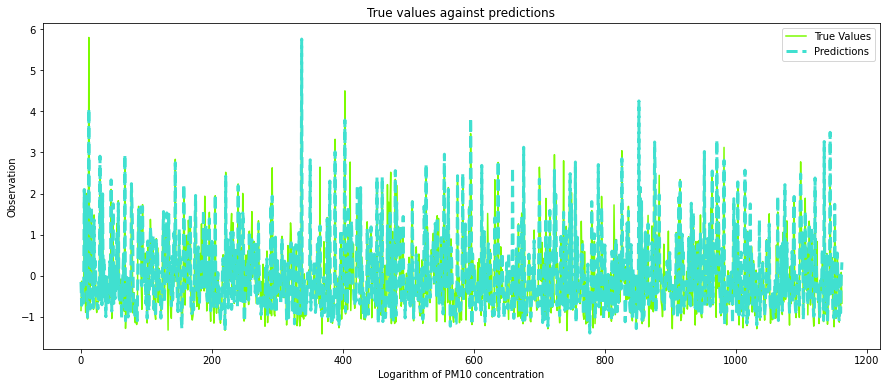

In [143]:
import matplotlib.pyplot as plt
plt.plot(list(y_test), label = "True Values", color='lawngreen')
comp_pred = model.predict(x_test)
plt.plot(comp_pred,  label = "Predictions", color='turquoise', linestyle='--',linewidth=3.0)
#plt.plot(list(y_test), label = "Valori Osservati", color='lawngreen')
plt.title("True values against predictions")
#plt.hlines(y=50, xmin=18620, xmax=18620+380, colors='red', linestyles='-', lw=2, label='PM10 daily threshold')
plt.ylabel("Observation")
plt.xlabel("Logarithm of PM10 concentration")
plt.legend()
plt.rcParams["figure.figsize"] = (15,6)

XGBoost

In [156]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)
keras.utils.set_random_seed(84)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test)
r2 = r2_keras(K.constant(y_test) , XGBpredictions)
print('XGBoost validation R2 = ',r2)

XGBoost validation R2 =  tf.Tensor(0.81818575, shape=(), dtype=float32)


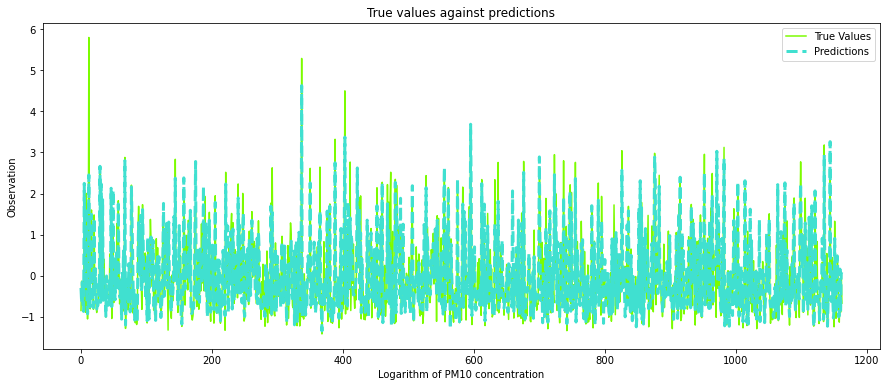

In [73]:
import matplotlib.pyplot as plt
plt.plot(list(y_test), label = "True Values", color='lawngreen')
plt.plot(XGBpredictions,  label = "Predictions", color='turquoise', linestyle='--',linewidth=3.0)
#plt.plot(list(y_test), label = "Valori Osservati", color='lawngreen')
plt.title("True values against predictions")
#plt.hlines(y=50, xmin=18620, xmax=18620+380, colors='red', linestyles='-', lw=2, label='PM10 daily threshold')
plt.ylabel("Observation")
plt.xlabel("Logarithm of PM10 concentration")
plt.legend()
plt.rcParams["figure.figsize"] = (15,6)

Ensemble

In [168]:
XGBpredictions = np.squeeze(XGBpredictions)
XGBpredictions = np.expand_dims(XGBpredictions, axis=1)
XGBpredictions.shape # deve essere (1163,1)

(1163, 1)

In [166]:
listapred = [supersimple_pred, simple_pred, medium_pred, comp_pred, XGBpredictions]
ens_pred = np.average(listapred, axis=0)
r2 = r2_keras(K.constant(y_test) , np.squeeze(ens_pred))
print('Ensemble validation R2 = ',r2)

Ensemble validation R2 =  tf.Tensor(0.84267914, shape=(), dtype=float32)


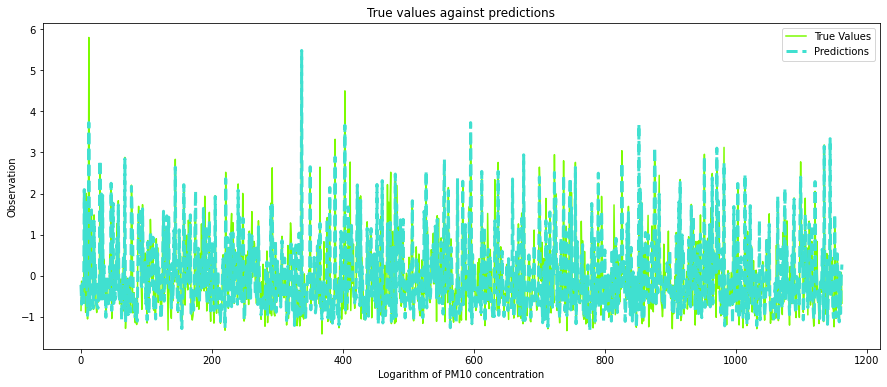

In [167]:
import matplotlib.pyplot as plt
plt.plot(list(y_test), label = "True Values", color='lawngreen')
plt.plot(ens_pred,  label = "Predictions", color='turquoise', linestyle='--',linewidth=3.0)
#plt.plot(list(y_test), label = "Valori Osservati", color='lawngreen')
plt.title("True values against predictions")
#plt.hlines(y=50, xmin=18620, xmax=18620+380, colors='red', linestyles='-', lw=2, label='PM10 daily threshold')
plt.ylabel("Observation")
plt.xlabel("Logarithm of PM10 concentration")
plt.legend()
plt.rcParams["figure.figsize"] = (15,6)